In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install champ-dataset, scikit-learn

In [3]:
import champ_dataset # "pip install champ-dataset" if necessary
dataset = champ_dataset.load('v0')
problem = dataset['P_Combinatorics_1']
print(problem.identifier)
print(problem.text)
print(problem.ch_list)
print(problem.answer)
for i, step in enumerate(problem.solution.steps):
    print('Step {idx}:'.format(idx=i+1))
    print(step.text)
    print([problem.ch_list[idx] for idx in step.ch_idxs])

P_Combinatorics_1
Let a string consist of digit 1, 2, 3. How many such strings of length 6 have adjacent digit differing by less than or equal to 1?
['H_Combinatorics_1_1', 'H_Combinatorics_1_2', 'H_Combinatorics_1_3', 'C_comb_sum']
239
Step 1:
Let x_n, y_n, z_n be the number of length-n strings that end with digit 1, 2, 3 respectively.
['H_Combinatorics_1_1']
Step 2:
Thus, we have x_1=y_1=z_1=1.
['H_Combinatorics_1_2']
Step 3:
For a string ending with 1, we can append 1 and 2; for a string ending with 2, we can append 1, 2 and 3; for a string ending with 3, we can append 2 and 3.
['H_Combinatorics_1_3']
Step 4:
Thus, we have x_(n+1)=x_n+y_n, y_(n+1)=x_n+y_n+z_n, and z_(n+1)=y_n+z_n.
['H_Combinatorics_1_3', 'C_comb_sum']
Step 5:
Starting from (1, 1, 1), we have the sequence of (x_n, y_n, z_n) to be (1, 1, 1), (2, 3, 2), (5, 7, 5), (12, 17, 12), (29, 41, 29), (70, 99, 70).
[]
Step 6:
Thus, in total, there are x_6+y_6+z_6=70+99+70=239 such strings.
[]


In [4]:

fws_annotation = dataset['P_Combinatorics_1'].fws_annotations['GPT-3.5|No C w/o H']
print(fws_annotation.text)
print(fws_annotation.author)
print(fws_annotation.start_idx, fws_annotation.end_idx)

print()
print()
print(fws_annotation.text[fws_annotation.start_idx:fws_annotation.end_idx])

To solve this problem, we can use the concept of recursion.

Let's define a function f(n) as the number of valid strings of length n. We want to find f(6).

For n = 1, there are three possible strings: "1", "2", "3". So, f(1) = 3.

For n > 1, we can consider the last digit of the string. It can be either 1, 2, or 3.

If the last digit is 1, then the second-to-last digit can be either 1 or 2. In this case, the number of valid strings of length n is equal to f(n-2). So, for the case where the last digit is 1, we have f(n) = f(n-2).

If the last digit is 2, then the second-to-last digit can be either 1, 2, or 3. In this case, the number of valid strings of length n is equal to f(n-1). So, for the case where the last digit is 2, we have f(n) = f(n-1).

If the last digit is 3, then the second-to-last digit can be either 2 or 3. In this case, the number of valid strings of length n is equal to f(n-2). So, for the case where the last digit is 3, we have f(n) = f(n-2).

Therefore, we can write

In [5]:
dataset['P_Combinatorics_1'].fws_annotations

{'GPT-3.5|No C w/o H': FWSAnnotation(text='To solve this problem, we can use the concept of recursion.\n\nLet\'s define a function f(n) as the number of valid strings of length n. We want to find f(6).\n\nFor n = 1, there are three possible strings: "1", "2", "3". So, f(1) = 3.\n\nFor n > 1, we can consider the last digit of the string. It can be either 1, 2, or 3.\n\nIf the last digit is 1, then the second-to-last digit can be either 1 or 2. In this case, the number of valid strings of length n is equal to f(n-2). So, for the case where the last digit is 1, we have f(n) = f(n-2).\n\nIf the last digit is 2, then the second-to-last digit can be either 1, 2, or 3. In this case, the number of valid strings of length n is equal to f(n-1). So, for the case where the last digit is 2, we have f(n) = f(n-1).\n\nIf the last digit is 3, then the second-to-last digit can be either 2 or 3. In this case, the number of valid strings of length n is equal to f(n-2). So, for the case where the last dig

In [6]:
len(list(dataset.problems))

270

In [7]:
for idx, problem in enumerate(dataset.problems):
    for fws_annotation in dataset[problem].fws_annotations.values():
        if fws_annotation.start_idx is None:
            continue
        print(dataset[problem].text)
        print(fws_annotation.start_idx, fws_annotation.end_idx)
        no_mistake = fws_annotation.text[:fws_annotation.start_idx]
        mistake = fws_annotation.text[:fws_annotation.end_idx]
        print(no_mistake)
        print()
        print(mistake)
        print()
        user = dataset[problem].text
        thought = mistake
    if idx == 10:
        break
    

Let a string consist of digit 1, 2, 3. How many such strings of length 6 have adjacent digit differing by less than or equal to 1?
319 469
To solve this problem, we can use the concept of recursion.

Let's define a function f(n) as the number of valid strings of length n. We want to find f(6).

For n = 1, there are three possible strings: "1", "2", "3". So, f(1) = 3.

For n > 1, we can consider the last digit of the string. It can be either 1, 2, or 3.



To solve this problem, we can use the concept of recursion.

Let's define a function f(n) as the number of valid strings of length n. We want to find f(6).

For n = 1, there are three possible strings: "1", "2", "3". So, f(1) = 3.

For n > 1, we can consider the last digit of the string. It can be either 1, 2, or 3.

If the last digit is 1, then the second-to-last digit can be either 1 or 2. In this case, the number of valid strings of length n is equal to f(n-2). 

How many strings of length 5 using the digits {0, 1, ..., 9} (with le

# set up nnsight model

In [15]:
from r1helpers import R1Prompter
from nnsight import LanguageModel
import torch as t
import os


prompter = R1Prompter()
lm = LanguageModel(os.path.join(prompter.cache_dir, prompter.model_name), device_map="auto")

In [16]:
toks, text = prompter.apply_format(user, thought)
from r1helpers import pprint
pprint(text)

╭──────────────────────────────────────────────────────────────────────────────────────────────────╮
│ <｜begin▁of▁sentence｜><｜User｜>Let a string consist of digit 1, 2, 3. How many such strings of │
│ length 6 have adjacent digit differing by less than or equal to 1? Please reason step by step,   │
│ and put your final answer within \boxed{}.<｜Assistant｜><think>                                 │
│ There are $\binom{n+n-1}{n-1} = \binom{2n-1}{n-1}$ ways to insert $n-1$ dividers into a row of   │
│ $n$ points. Each of these ways corresponds to a sequence of $n$ positive integers with sum $n$,  │
│ where the integers in the sequence correspond to the positions of the dividers.                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯

In [17]:
from tqdm import tqdm
N_LAYERS = len(lm.model.layers)

latents_correct = []
latents_mistake = []
for idx, problem in tqdm(enumerate(dataset.problems)):
    for fws_annotation in dataset[problem].fws_annotations.values():
        if fws_annotation.start_idx is None:
            continue
        no_mistake = fws_annotation.text[:fws_annotation.start_idx]
        mistake = fws_annotation.text[:fws_annotation.end_idx]
        user = dataset[problem].text
        user += " Please reason step by step, and put your final answer within \\boxed{}."
        toks0, text0 = prompter.apply_format(user, no_mistake)
        toks1, text1 = prompter.apply_format(user, mistake)
        with t.no_grad():
            with lm.trace(toks0) as tracer:
                hs = [lm.model.layers[layer_idx].output[0][0,-1].save() for layer_idx in range(N_LAYERS)]
        hs0 = t.stack(hs)
        with t.no_grad():
            with lm.trace(toks1) as tracer:
                hs = [lm.model.layers[layer_idx].output[0][0,-1].save() for layer_idx in range(N_LAYERS)]
        hs1 = t.stack(hs)
        latents_correct.append(hs0.cpu())
        latents_mistake.append(hs1.cpu())

    if idx == 150:
        break

0it [00:00, ?it/s]You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

150it [02:11,  1.14it/s]


In [19]:
latents_correct = t.stack(latents_correct)
latents_mistake = t.stack(latents_mistake)

In [21]:
latents_correct = latents_correct.permute(1, 0, 2)
latents_mistake = latents_mistake.permute(1, 0, 2)
print(latents_correct.shape, latents_mistake.shape)


torch.Size([32, 246, 4096]) torch.Size([32, 246, 4096])


  0%|          | 0/32 [00:00<?, ?it/s]

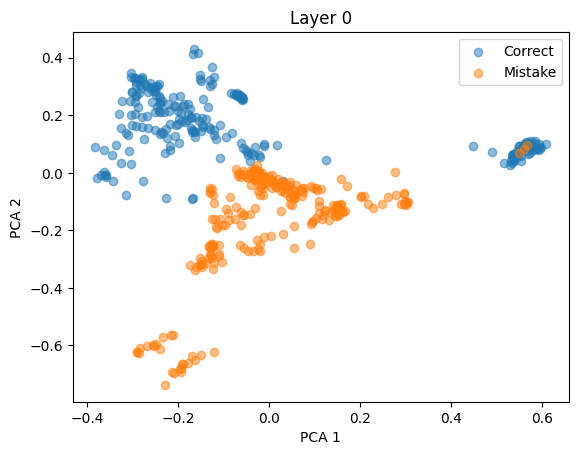

  3%|▎         | 1/32 [00:00<00:07,  4.19it/s]

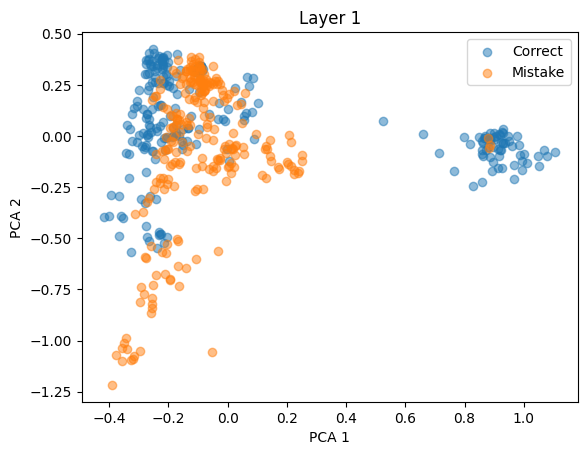

  6%|▋         | 2/32 [00:00<00:05,  5.64it/s]

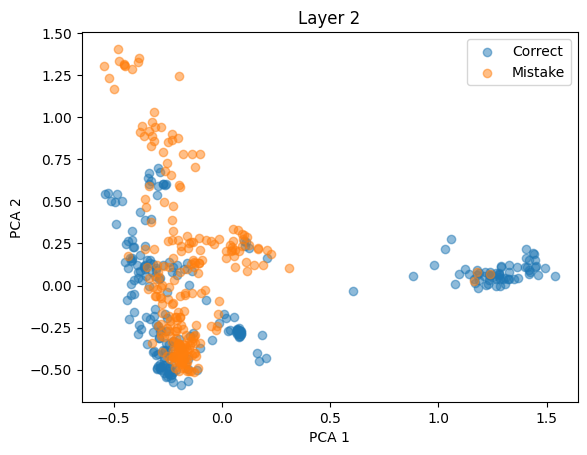

  9%|▉         | 3/32 [00:00<00:06,  4.66it/s]

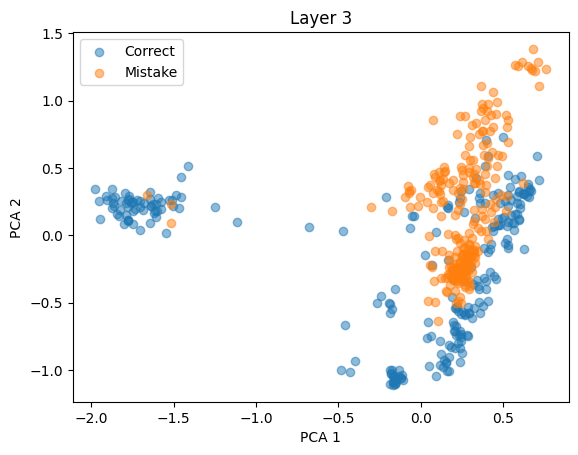

 12%|█▎        | 4/32 [00:00<00:06,  4.36it/s]

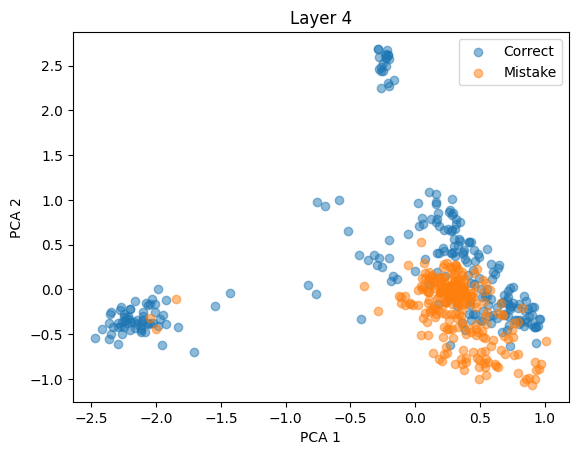

 16%|█▌        | 5/32 [00:01<00:05,  5.12it/s]

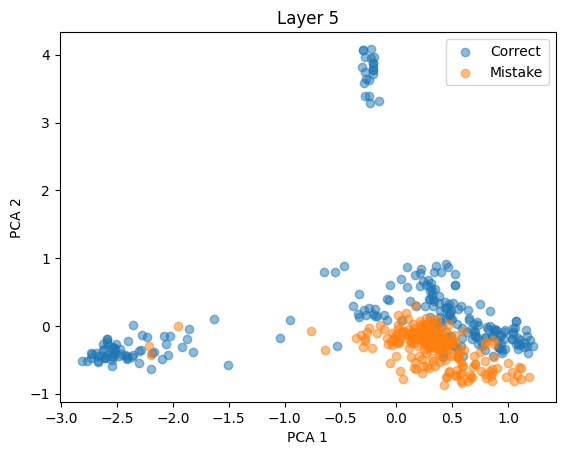

 19%|█▉        | 6/32 [00:01<00:04,  5.87it/s]

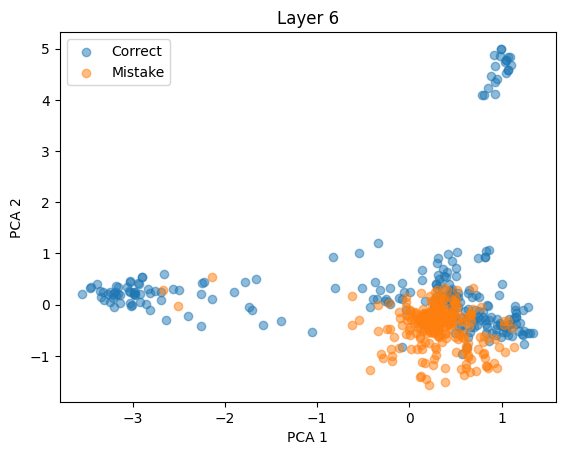

 22%|██▏       | 7/32 [00:01<00:03,  6.52it/s]

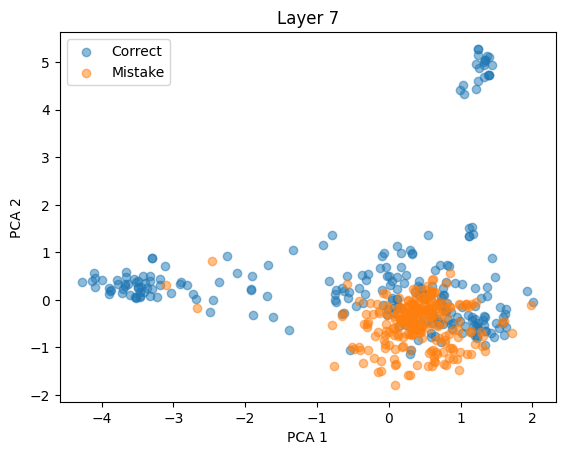

 25%|██▌       | 8/32 [00:01<00:03,  6.91it/s]

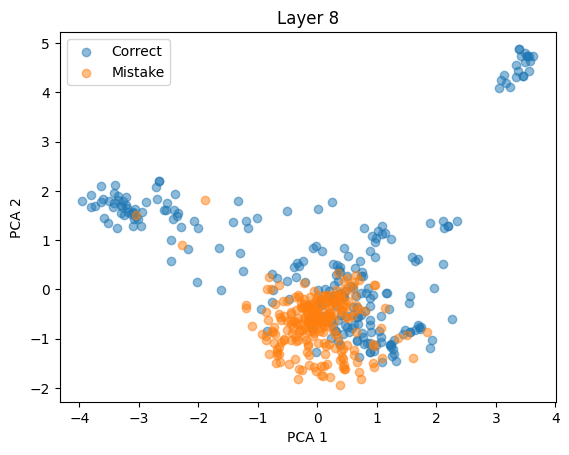

 28%|██▊       | 9/32 [00:01<00:03,  7.12it/s]

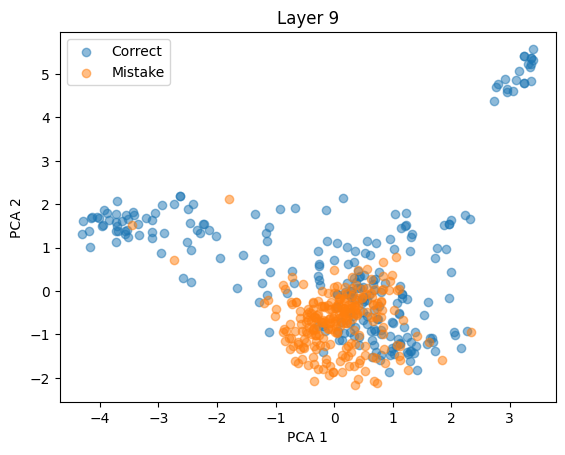

 31%|███▏      | 10/32 [00:01<00:05,  4.11it/s]

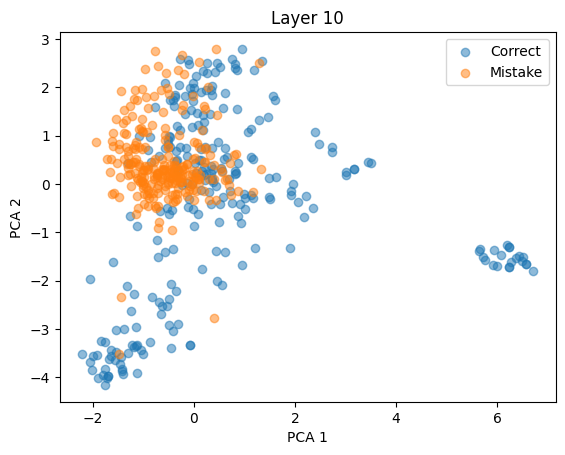

 34%|███▍      | 11/32 [00:02<00:06,  3.42it/s]

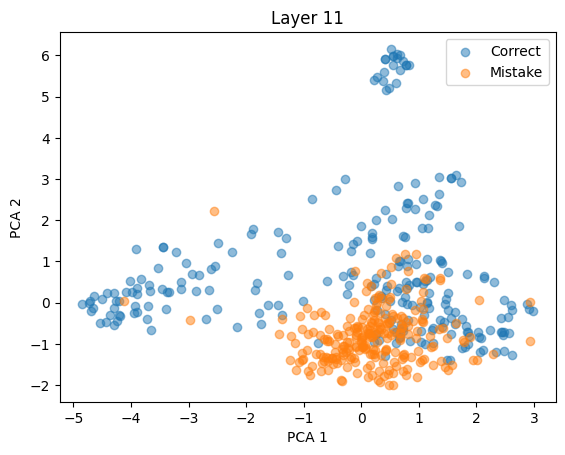

 38%|███▊      | 12/32 [00:02<00:04,  4.07it/s]

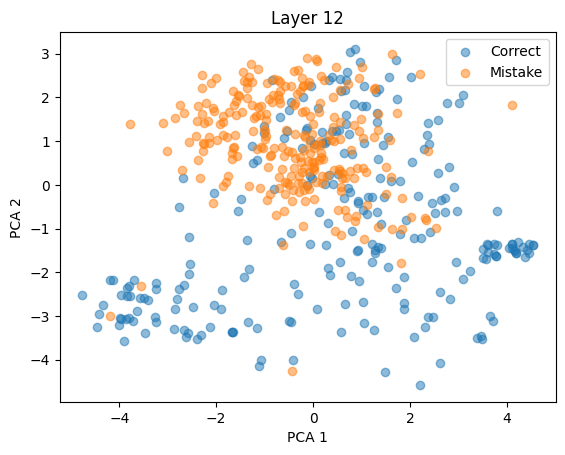

 41%|████      | 13/32 [00:02<00:04,  4.03it/s]

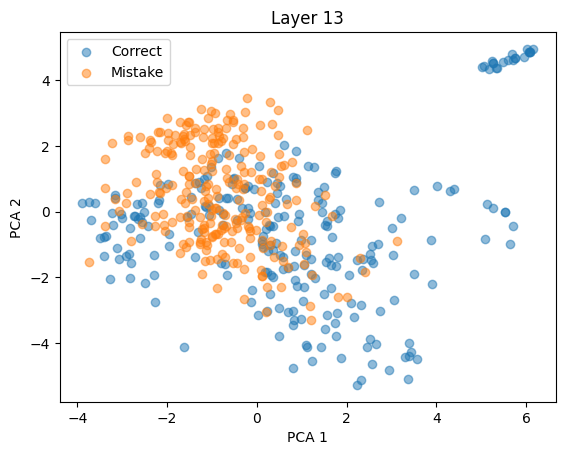

 44%|████▍     | 14/32 [00:02<00:03,  4.75it/s]

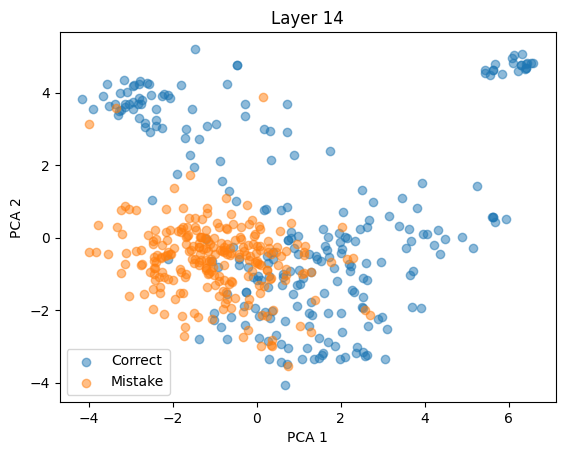

 47%|████▋     | 15/32 [00:03<00:04,  3.75it/s]

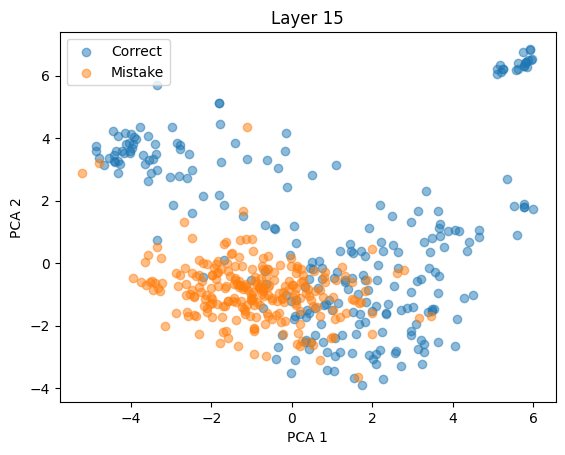

 50%|█████     | 16/32 [00:03<00:03,  4.49it/s]

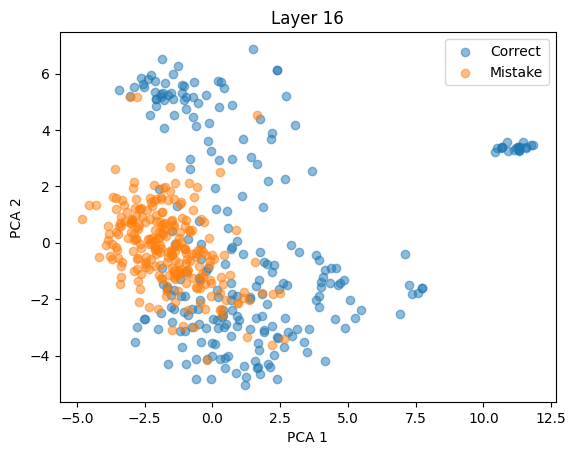

 53%|█████▎    | 17/32 [00:03<00:02,  5.15it/s]

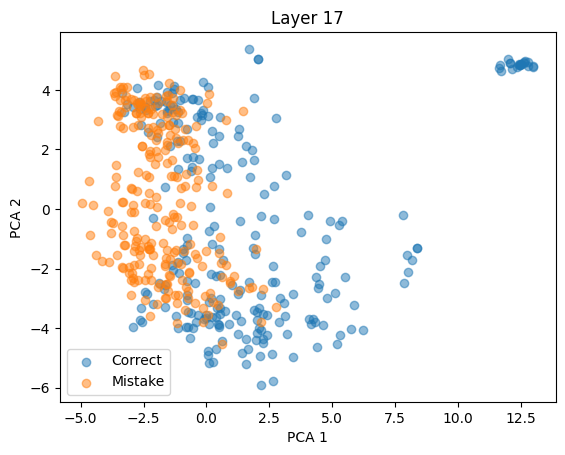

 56%|█████▋    | 18/32 [00:03<00:02,  5.48it/s]

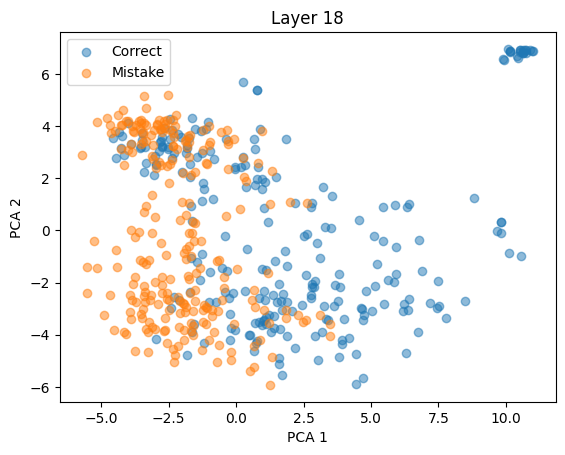

 59%|█████▉    | 19/32 [00:03<00:02,  4.79it/s]

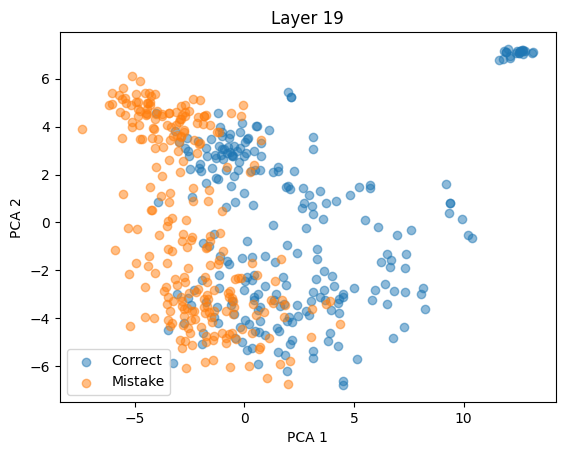

 62%|██████▎   | 20/32 [00:04<00:02,  4.48it/s]

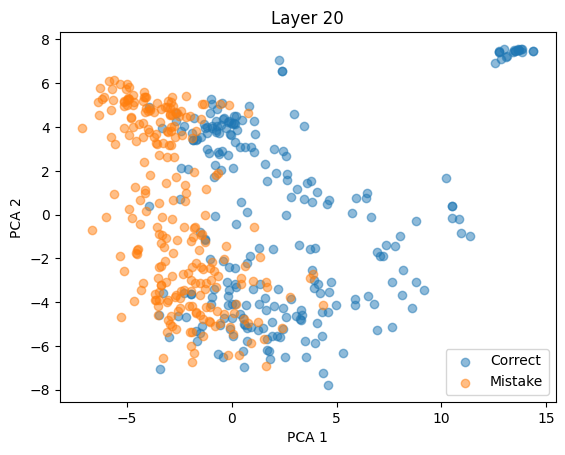

 66%|██████▌   | 21/32 [00:04<00:02,  4.46it/s]

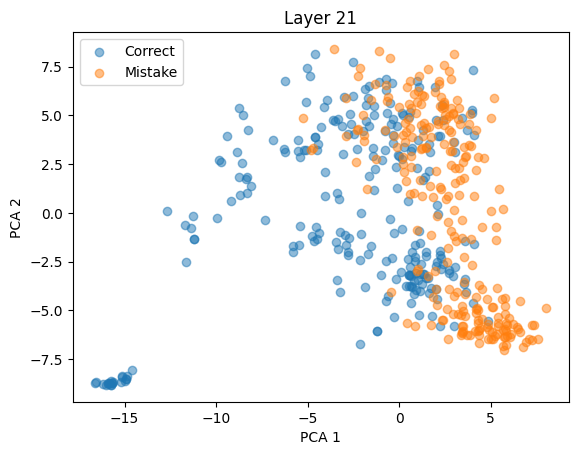

 69%|██████▉   | 22/32 [00:04<00:02,  4.30it/s]

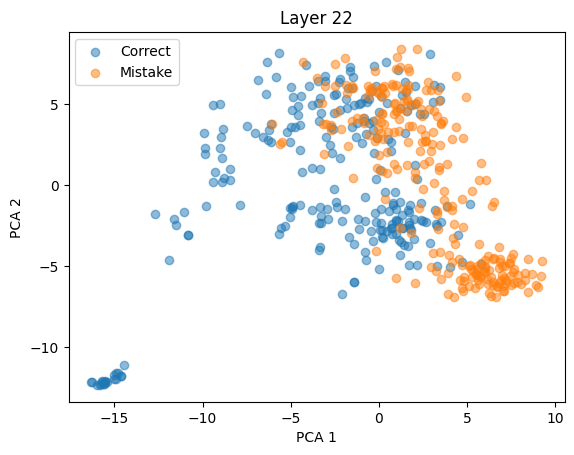

 72%|███████▏  | 23/32 [00:04<00:02,  4.22it/s]

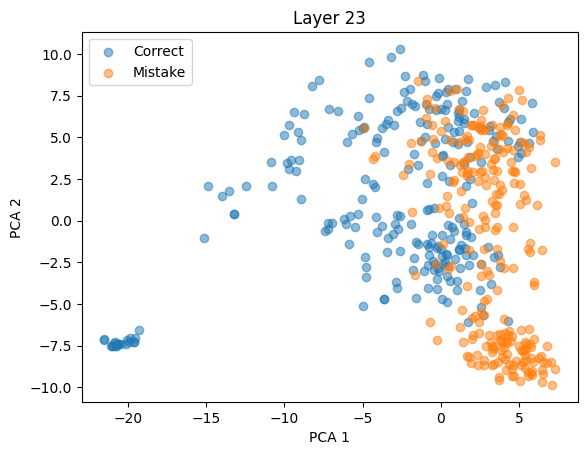

 75%|███████▌  | 24/32 [00:05<00:01,  4.68it/s]

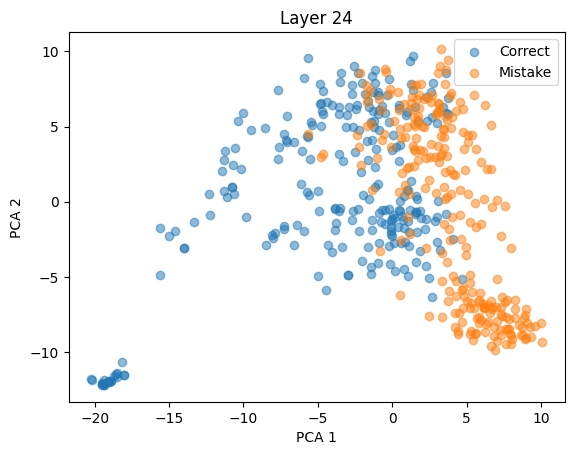

 78%|███████▊  | 25/32 [00:05<00:01,  5.25it/s]

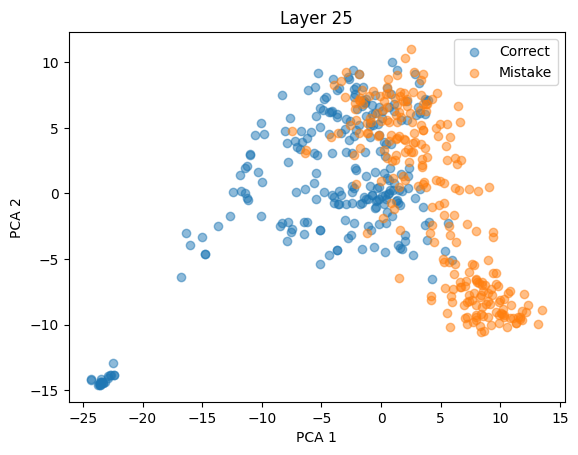

 81%|████████▏ | 26/32 [00:05<00:01,  5.60it/s]

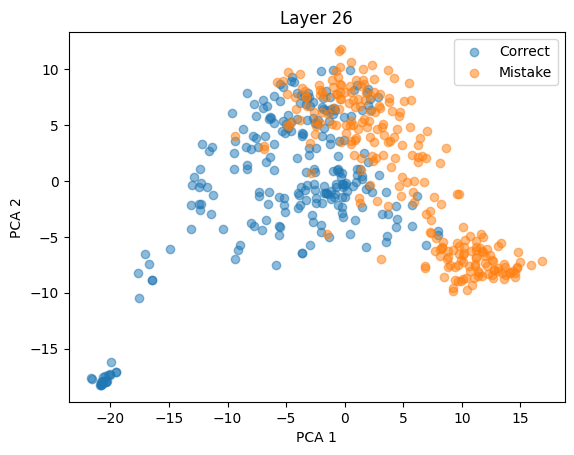

 84%|████████▍ | 27/32 [00:05<00:00,  5.76it/s]

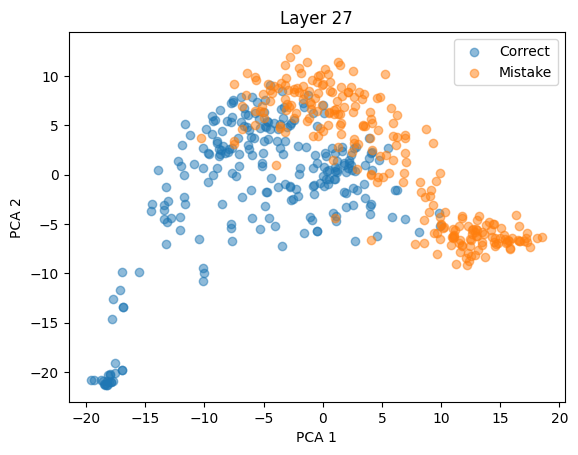

 88%|████████▊ | 28/32 [00:05<00:00,  4.98it/s]

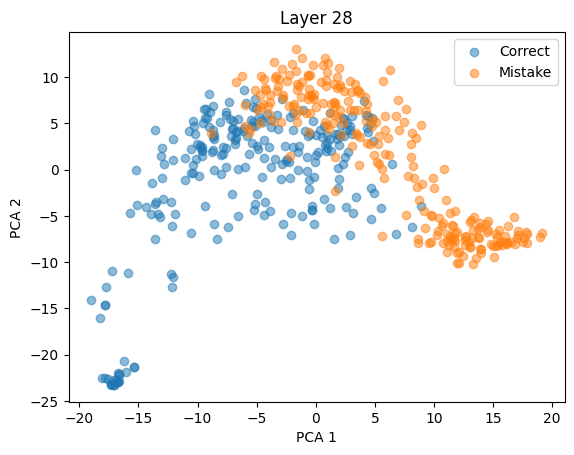

 91%|█████████ | 29/32 [00:06<00:00,  5.14it/s]

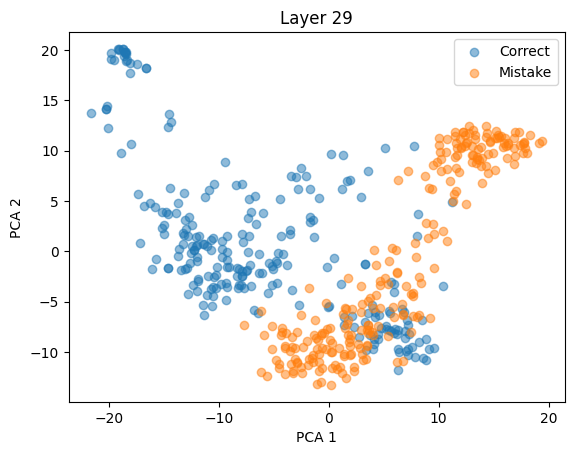

 94%|█████████▍| 30/32 [00:06<00:00,  5.17it/s]

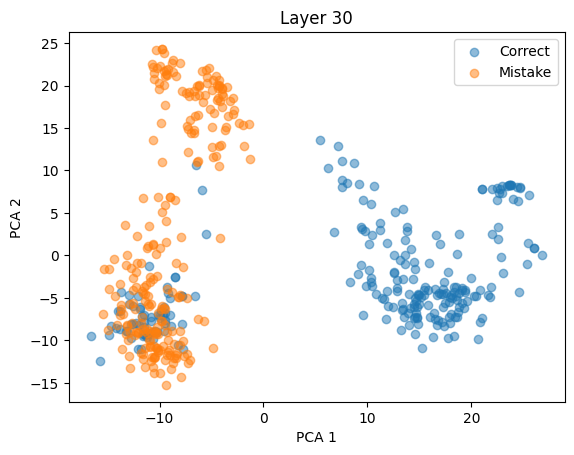

 97%|█████████▋| 31/32 [00:06<00:00,  5.55it/s]

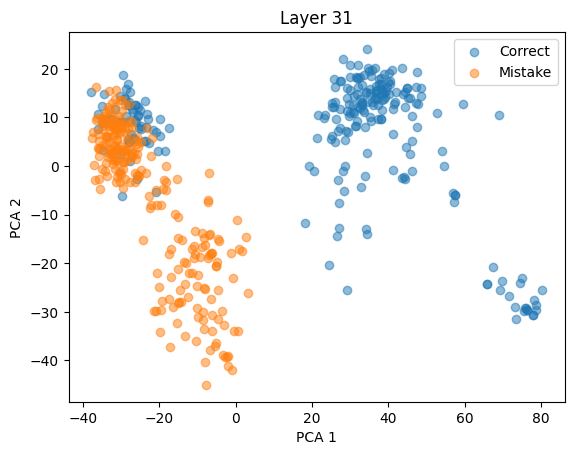

100%|██████████| 32/32 [00:06<00:00,  4.89it/s]


In [24]:
# do a pca plot for each layer
from sklearn.decomposition import PCA
from tqdm import tqdm 
from matplotlib import pyplot as plt

latents_all = t.cat([latents_correct, latents_mistake], dim=1)

for layer_idx in tqdm(range(N_LAYERS)):
    pca = PCA(n_components=2)
    latents_pca = pca.fit_transform(latents_all[layer_idx].numpy())
    # scatter plot the two classes (first half and second half)
    plt.scatter(latents_pca[:latents_correct.shape[1], 0], latents_pca[:latents_correct.shape[1], 1], label="Correct", alpha=0.5)
    plt.scatter(latents_pca[latents_correct.shape[1]:, 0], latents_pca[latents_correct.shape[1]:, 1], label="Mistake", alpha=0.5)
    plt.legend()
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title(f"Layer {layer_idx}")
    plt.show()

100%|██████████| 32/32 [00:02<00:00, 13.00it/s]


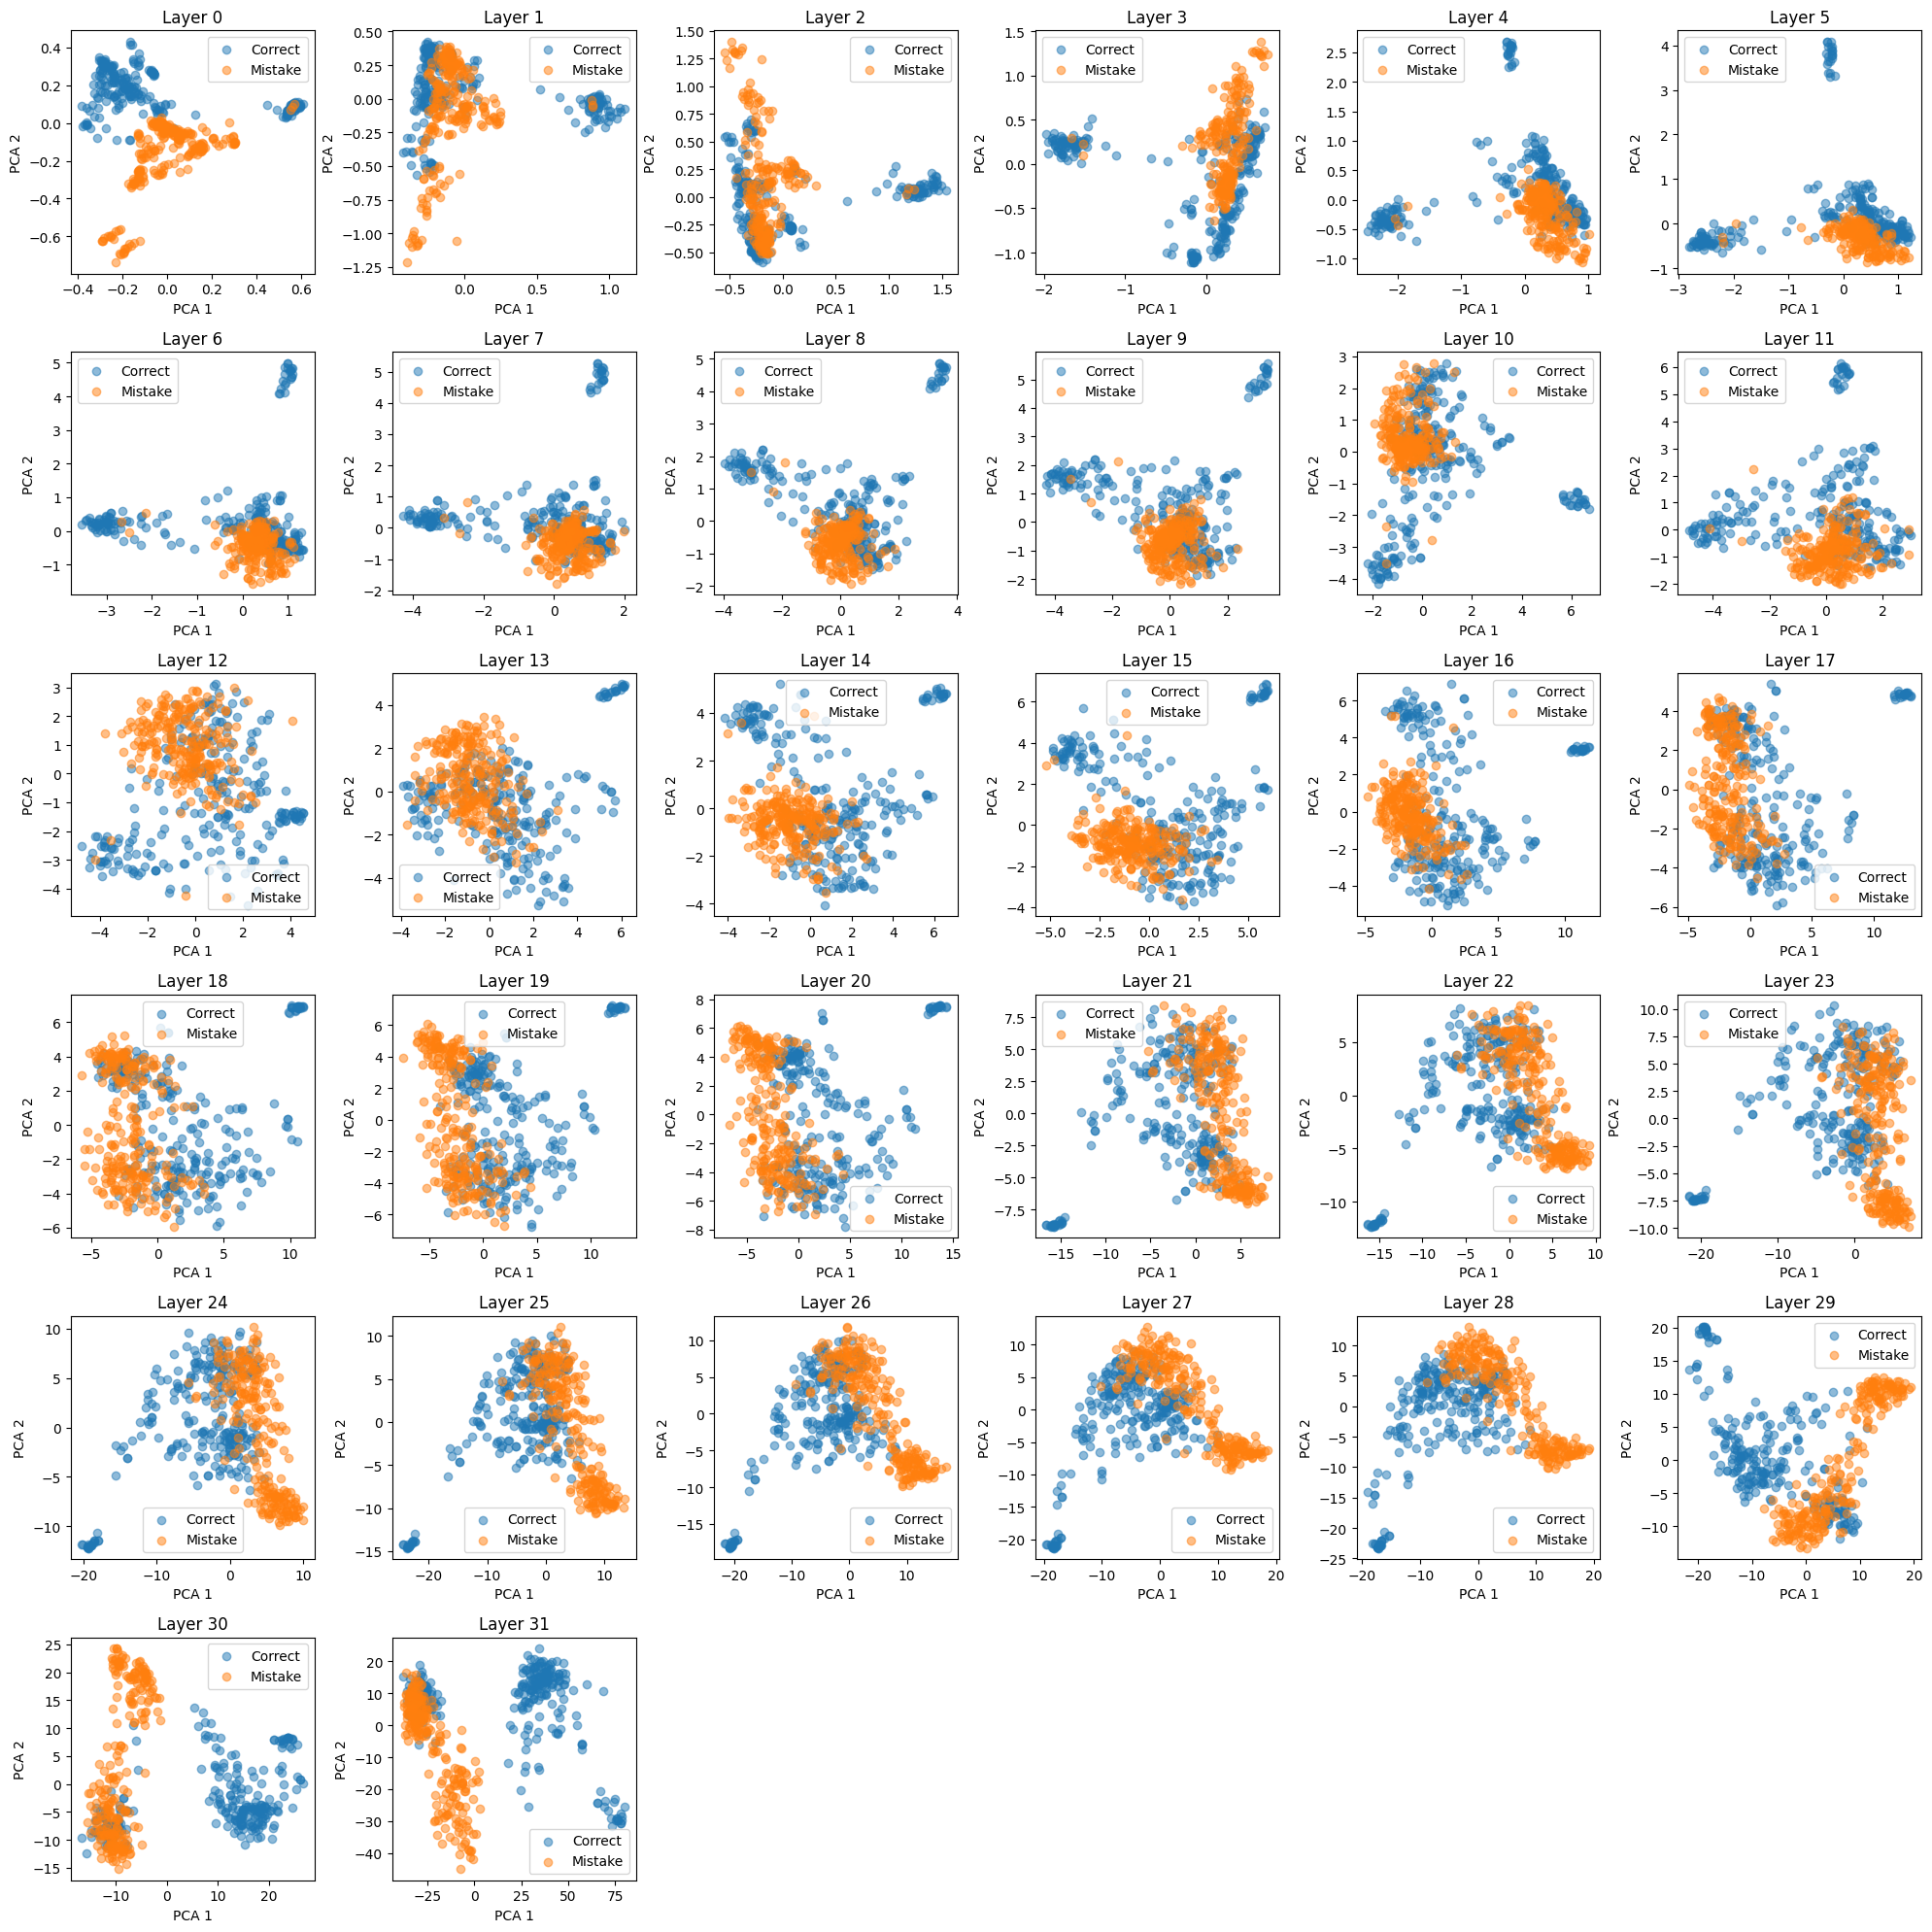

In [25]:
# do a pca plot for each layer in a grid
from sklearn.decomposition import PCA
from tqdm import tqdm 
from matplotlib import pyplot as plt
import numpy as np

latents_all = t.cat([latents_correct, latents_mistake], dim=1)

# Calculate grid dimensions
n_rows = int(np.ceil(np.sqrt(N_LAYERS)))
n_cols = int(np.ceil(N_LAYERS / n_rows))

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

for layer_idx in tqdm(range(N_LAYERS)):
    pca = PCA(n_components=2)
    latents_pca = pca.fit_transform(latents_all[layer_idx].numpy())
    
    # Plot on the corresponding subplot
    ax = axes[layer_idx]
    ax.scatter(latents_pca[:latents_correct.shape[1], 0], latents_pca[:latents_correct.shape[1], 1], 
              label="Correct", alpha=0.5)
    ax.scatter(latents_pca[latents_correct.shape[1]:, 0], latents_pca[latents_correct.shape[1]:, 1], 
              label="Mistake", alpha=0.5)
    ax.legend()
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_title(f"Layer {layer_idx}")

# Remove empty subplots if any
for idx in range(N_LAYERS, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

100%|██████████| 32/32 [00:03<00:00,  9.02it/s]


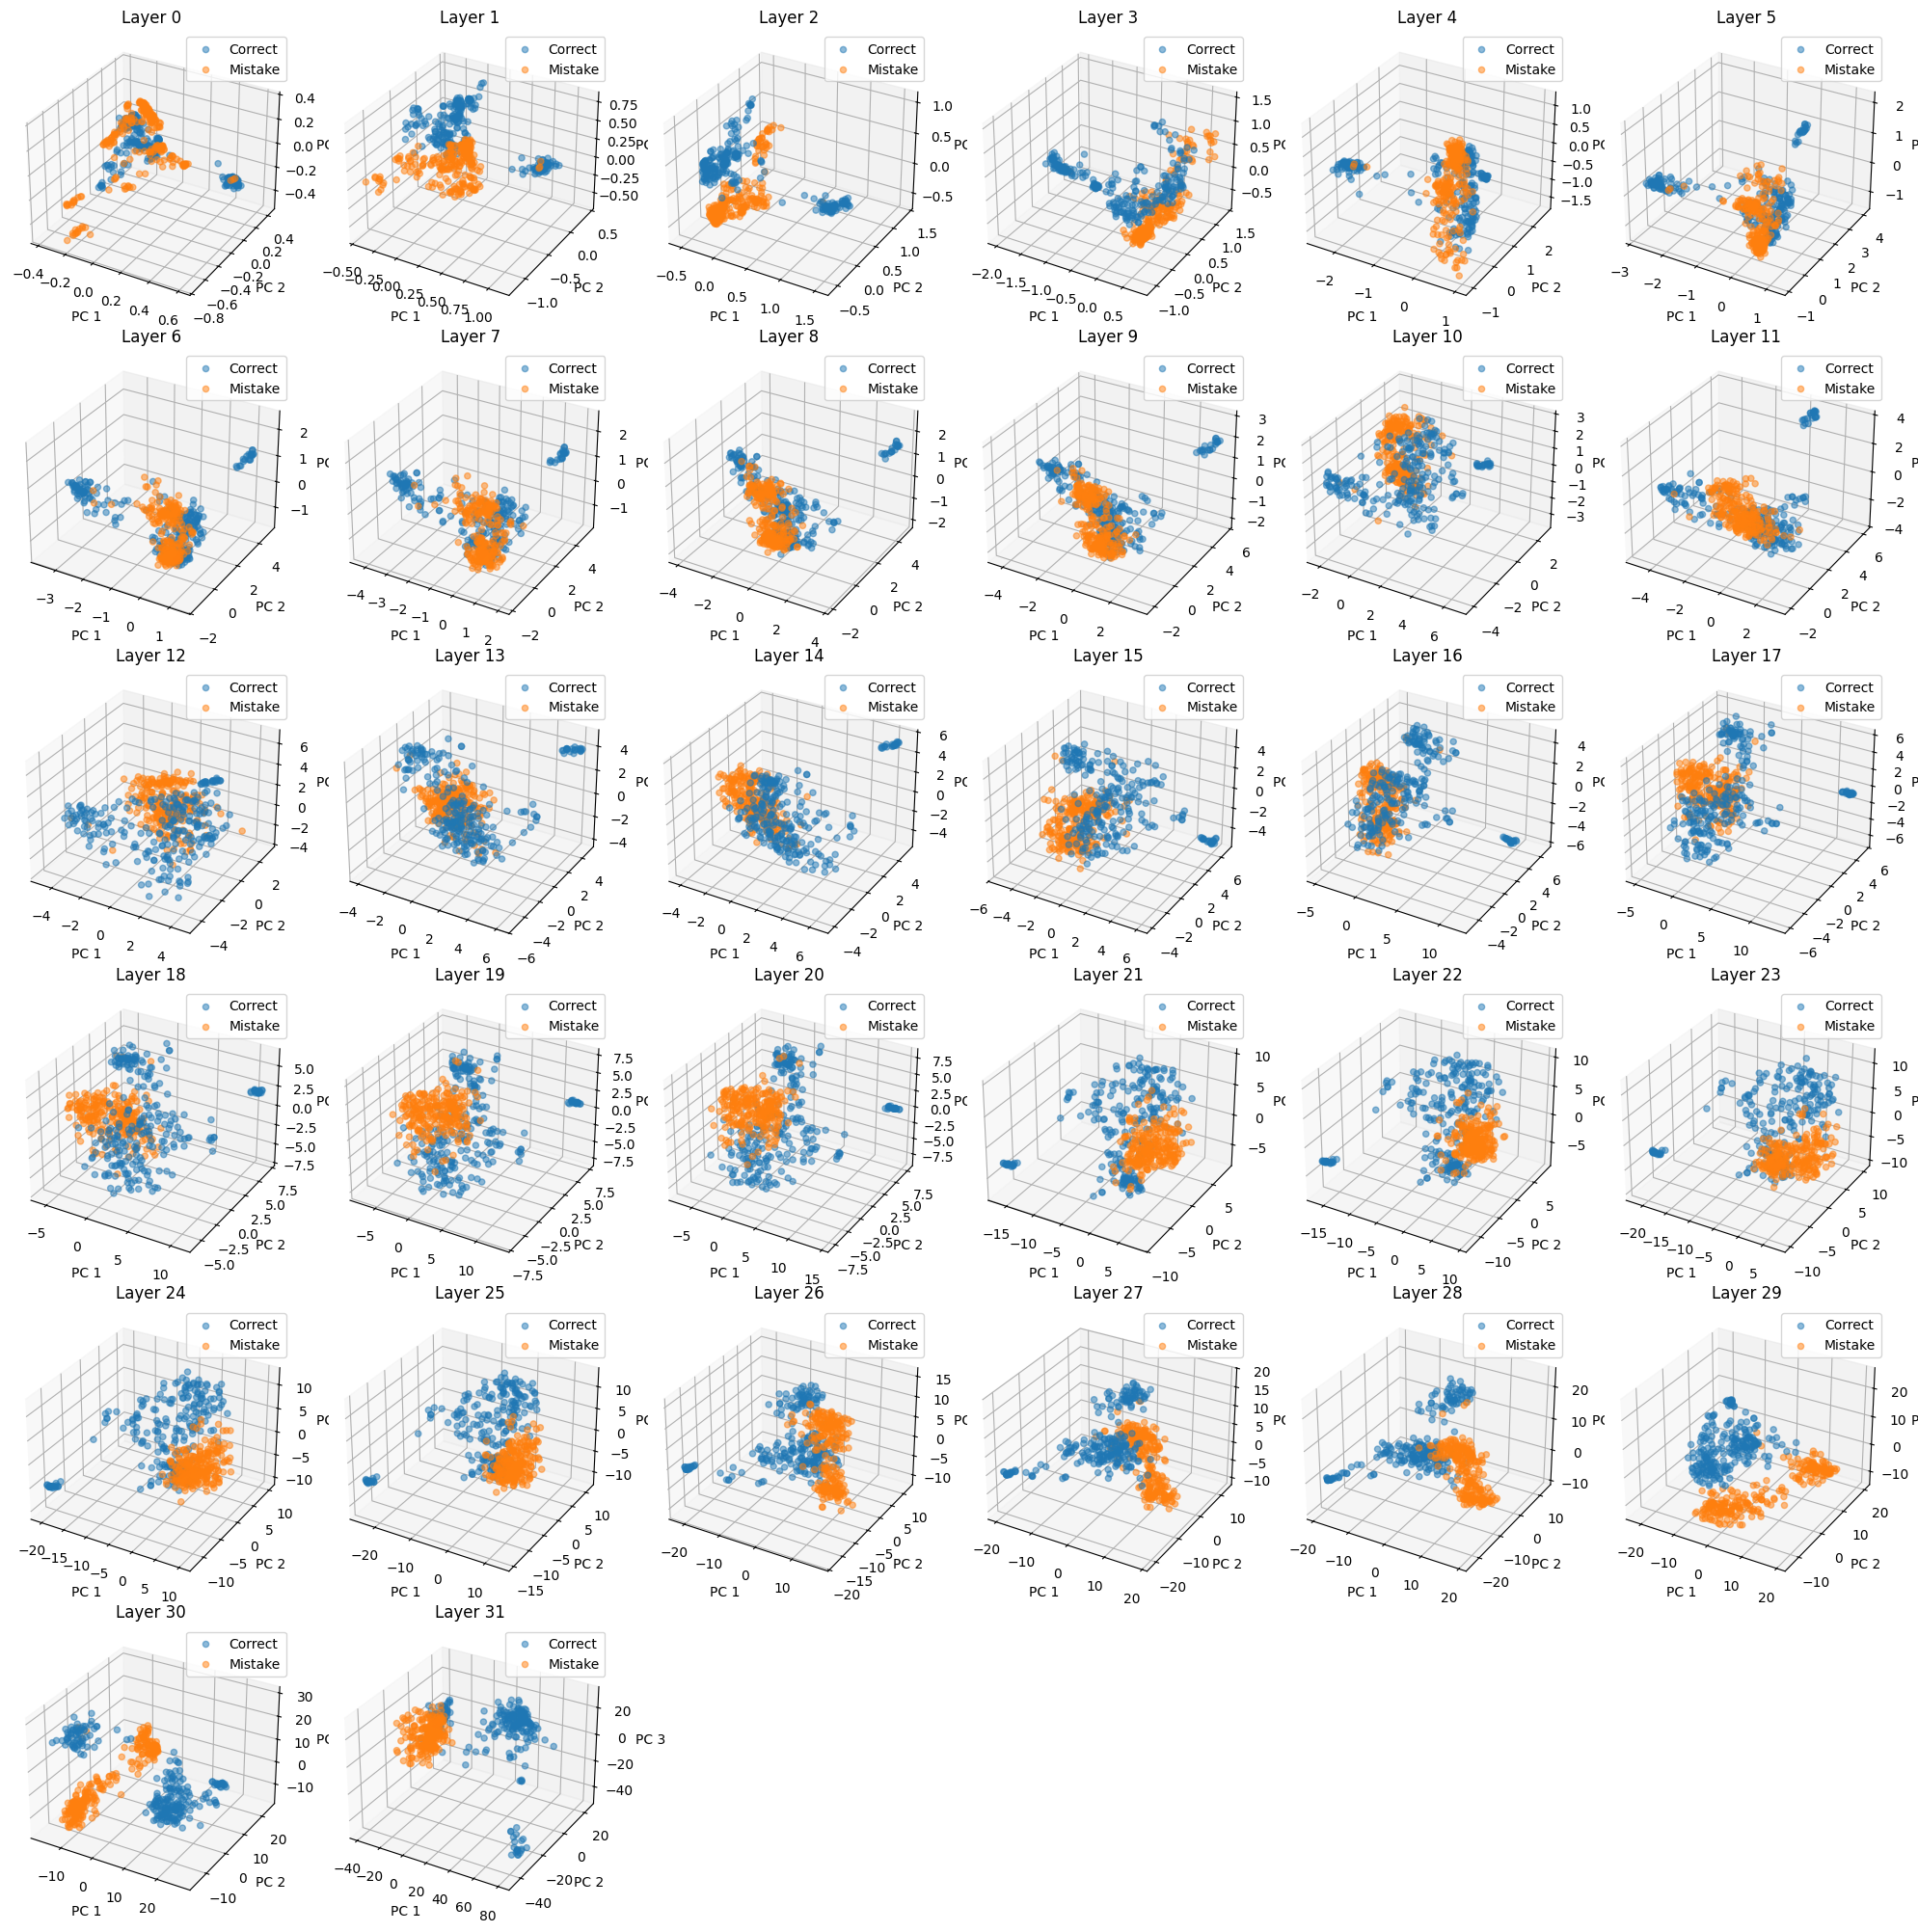

In [26]:
# do a pca plot for each layer in a grid, showing first 3 PCs
from sklearn.decomposition import PCA
from tqdm import tqdm 
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

latents_all = t.cat([latents_correct, latents_mistake], dim=1)

# Calculate grid dimensions
n_rows = int(np.ceil(np.sqrt(N_LAYERS)))
n_cols = int(np.ceil(N_LAYERS / n_rows))

# Create a figure with 3D subplots
fig = plt.figure(figsize=(20, 20))

for layer_idx in tqdm(range(N_LAYERS)):
    pca = PCA(n_components=3)
    latents_pca = pca.fit_transform(latents_all[layer_idx].numpy())
    
    # Create 3D subplot
    ax = fig.add_subplot(n_rows, n_cols, layer_idx + 1, projection='3d')
    
    # Plot correct points
    ax.scatter(latents_pca[:latents_correct.shape[1], 0], 
              latents_pca[:latents_correct.shape[1], 1],
              latents_pca[:latents_correct.shape[1], 2],
              label="Correct", alpha=0.5)
              
    # Plot mistake points              
    ax.scatter(latents_pca[latents_correct.shape[1]:, 0],
              latents_pca[latents_correct.shape[1]:, 1],
              latents_pca[latents_correct.shape[1]:, 2],
              label="Mistake", alpha=0.5)
              
    ax.legend()
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2") 
    ax.set_zlabel("PC 3")
    ax.set_title(f"Layer {layer_idx}")

plt.tight_layout()
plt.show()